In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Human 

In [ ]:
hfd_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/HFD_All_Epochs/'
hurst_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/Hurst_All_Epochs/'
entr_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/DispEn/'
test_num_epochs = '/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/'

In [ ]:
patient_list  =  ['P1 N1', 'P2 N1', 'P2 N2', 'P3 N1', 'P3 N2', 'P4 N1', 'P4 N2', 'P5 N1',
                  'P6 N1', 'P6 N2', 'P7 N1', 'P7 N2','P8 N1','P10 N1', 'P11 N1', 'P15 N1',
                  'P16 N1', 'P17 N1', 'P18 N1','P20 N1', 'P21 N1', 'P21 N2', 'P21 N3',
                  'P22 N1','P23 N1', 'P23 N2', 'P23 N3', 'P24 N1','P27 N1','P28 N1',
                  'P28 N2', 'P29 N2', 'P30 N1'] 

In [ ]:
all_patients = []
for patient in patient_list:
    print(patient)
    dispen_ls = []
    for file in os.listdir(entr_dir): 
        if file.startswith(patient):
            channel = file.split('_')[1]
            if channel == 'N2':
                channel = file.split('_')[2]
                dispen_file = np.load(entr_dir + file).flatten()
                dispen_dict = {'Channel': [str(channel)] * len(dispen_file), 'dispen': dispen_file}
                dispen_df = pd.DataFrame(data=dispen_dict)
                dispen_ls.append(dispen_df)    
            else:
                channel = file.split('_')[1]
                dispen_file = np.load(entr_dir + file).flatten()
                dispen_dict = {'Channel': [str(channel)] * len(dispen_file), 'dispen': dispen_file}
                dispen_df = pd.DataFrame(data=dispen_dict)
                dispen_ls.append(dispen_df) 
    patient_dispen_df = pd.concat(dispen_ls, axis=0).reset_index()
    patient_id_df = pd.DataFrame(data = {'Patient': [patient] * len(patient_dispen_df)}).reset_index()
    patient_concat = pd.concat([patient_id_df, patient_dispen_df], axis = 1)
    dispen_dup = patient_concat.loc[:, ~patient_concat.columns.duplicated()]
    all_patients.append(dispen_dup)


In [ ]:
all_patients_concat = pd.concat(all_patients, axis = 0)
all_patients_concat

In [ ]:
np.unique(all_patients_concat['Channel'])

In [ ]:
genotype_human = {'P1': 'WT', 'P2': 'GAP', 'P3': 'GAP', 'P4': 'WT', 
                  'P5': 'GAP', 'P6': 'GAP', 'P7': 'GAP', 'P8' : 'WT',
                  'P9': 'GAP', 'P10': 'GAP', 'P11': 'WT', 'P12': 'WT',
                  'P13': 'GAP', 'P14': 'WT', 'P15': 'GAP', 'P16': 'GAP',
                  'P17': 'WT', 'P18': 'WT', 'P19': 'WT', 'P20': 'GAP',
                  'P21': 'WT', 'P22': 'GAP', 'P23': 'GAP', 'P24': 'WT',
                  'P25': 'WT', 'P26': 'GAP', 'P27': 'WT', 'P28': 'WT',
                  'P29': 'WT', 'P30': 'GAP'} 

In [ ]:
all_patients_concat['Genotype'] = all_patients_concat['Patient'].apply(lambda x: genotype_human.get(x.split()[0], 'Unknown'))

In [ ]:
mean_df = all_patients_concat.groupby(["Patient", "Channel", "Genotype"])["dispen"].mean().reset_index()
# Define the desired order of frequencies

In [ ]:
## Order rows
#mean_df = mean_df.groupby(["Patient", "Channel", "Genotype"])["hfd"].mean().reset_index()

# Define the desired order of frequencies
desired_order = ['01', 'C3', 'E1', 'E2', 'F3', 'M2']

# Create a Categorical data type with the desired order
category_order = pd.Categorical(mean_df['Channel'], categories=desired_order, ordered=True)

# Assign the Categorical data type to the 'Frequency' column
mean_df['Channel'] = category_order

# Sort the DataFrame based on the 'Frequency' column
sorted_df = mean_df.sort_values(['Patient', 'Channel', 'Genotype'])
sorted_df

In [ ]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Channel", y="dispen", hue="Genotype", data=all_patients_concat, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Channel")
plt.ylabel("Dispersion Entropy")
plt.title("Genotype Dispersion Entropy")
plt.ylim(0, 4.0)

stripplot = sns.stripplot(x="Channel",y="dispen",hue="Genotype",data=mean_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

# Remove the legend
plt.legend(labels=[])

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/Plots/')
plt.savefig("genotype_dispen.png", dpi=300, bbox_inches="tight")
plt.savefig("genotype_dispen.svg", dpi=300, bbox_inches="tight")
plt.show()

## Rat 

In [2]:
hfd_dir = '/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/hfd/'
hurst_dir = '/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/hurst/'

In [7]:
wildtype_animal_ids = ['S7068', 'S7070', 'S7071', 'S7074', 'S7086', 'S7087', 'S7091', 'S7098', 'S7101']
gap_animal_ids = ['S7063', 'S7064', 'S7069', 'S7072', 'S7075', 'S7076', 'S7088', 'S7092', 'S7094'] #S7096

In [5]:
ls_hurst = os.listdir(hurst_dir)
all_animals = []
for file in ls_hfd:
    animal_id = file.split('_')[0]
    all_animals.append(animal_id)


In [12]:
animals = ['S7068', 'S7070', 'S7071', 'S7072',
       'S7074', 'S7075', 'S7076',  'S7091',
       'S7092', 'S7094', 'S7098', 'S7101', 'S7063', 'S7064', 'S7069', 'S7088','S7086']

In [9]:
syngap_2_ls =  ['S7096', 'S7070', 'S7072', 'S7083', 'S7063','S7064', 'S7069', 'S7086', 'S7091'] 
SYNGAP_1_ID_ls = ['S7101','S7088', 'S7092', 'S7094', 'S7098', 'S7068', 'S7074', 'S7076', 'S7071', 'S7075']
directory_path = '/home/melissa/PREPROCESSING/SYNGAP1/cleaned_br_files/'

In [19]:
animals_complex_ls = []
for animal in animals:
    print(animal)
    if animal in wildtype_animal_ids:
        genotype = 'WT'
    elif animal in gap_animal_ids:
        genotype = 'GAP'
    soma_hfd = np.load(hurst_dir + animal + '_somatosensory.npy').flatten()
    motor_hfd = np.load(hurst_dir + animal + '_motor.npy').flatten()
    visual_hfd = np.load(hurst_dir + animal + '_visual.npy').flatten()
    if animal in syngap_2_ls:
        br_1 = pd.read_pickle(directory_path + animal + '_BL1.pkl')
        br_2 = pd.read_pickle(directory_path + animal + '_BL1.pkl')
        indices_1 = br_1[br_1['brainstate'].isin([0, 1, 2])].index
        indices_2 = br_2[br_2['brainstate'].isin([0, 1, 2])].index
        indices_2_new = [(idx + 17280) for idx in indices_2]
        indices = np.concatenate((indices_1, indices_2_new))
        
        values_1 =  br_1[br_1['brainstate'].isin([0, 1, 2])]
        values_2 =  br_2[br_2['brainstate'].isin([0, 1, 2])]
        values_br = values_1['brainstate'].tolist() + values_2['brainstate'].tolist()
        
    else:
        br_1 = pd.read_pickle(directory_path + animal + '_BL1.pkl')
        values = br_1[br_1['brainstate'].isin([0, 1, 2])]
        values_br = values['brainstate'].tolist()
        indices = br_1[br_1['brainstate'].isin([0, 1, 2])].index
    # Delete the specified indices
    motor_new = motor_hfd[indices]
    soma_new = soma_hfd[indices]
    visual_new = visual_hfd[indices]
    motor_dict = {'Animal': [animal]*len(values_br), 'Genotype': [genotype]*len(values_br),
                 'Brainstate': values_br,
                 'Region': ['motor']*len(values_br),
                  'hurst': motor_new}
    soma_dict = {'Animal': [animal]*len(values_br), 'Genotype': [genotype]*len(values_br),
                 'Brainstate': values_br,
                 'Region': ['somatosensory']*len(values_br),
                  'hurst': soma_new} 
    visual_dict = {'Animal': [animal]*len(values_br), 'Genotype': [genotype]*len(values_br),
                 'Brainstate': values_br,
                 'Region': ['visual']*len(values_br),
                  'hurst': visual_new}
    
    motor_df = pd.DataFrame(data = motor_dict)
    soma_df = pd.DataFrame(data = soma_dict)
    visual_df = pd.DataFrame(data = visual_dict)
    complex_df = pd.concat([motor_df, soma_df, visual_df], axis = 0)
    animals_complex_ls.append(complex_df)

S7068
S7070
S7071
S7072
S7074
S7075
S7076
S7091
S7092
S7094
S7098
S7101


In [ ]:
animals_concat = pd.concat(animals_complex_ls)

In [ ]:
gap_hfd = animals_concat[]

In [ ]:
mean_df = animals_concat.groupby(["Animal", "Genotype", "Region"])["hfd"].mean().reset_index()

In [ ]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Region", y="hfd", hue="Genotype", data=animals_concat, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Fractal Dimension")
plt.title("Genotype Higuchi's Fractal Dimension")
plt.ylim(0, 2.0)

stripplot = sns.stripplot(x="Region",y="hfd",hue="Genotype",data=mean_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

# Remove the legend
plt.legend(labels=[])

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/Plots/hfd/')
#plt.savefig("genotype_hfd.png", dpi=300, bbox_inches="tight")
#plt.savefig("genotype_hfd.svg", dpi=300, bbox_inches="tight")
#plt.show()

In [ ]:
gap_hfd = animals_concat.loc[animals_concat['Genotype'] == 'GAP']
wt_hfd = animals_concat.loc[animals_concat['Genotype'] == 'WT']

In [ ]:
mean_gap_df = gap_hfd.groupby(["Animal", "Genotype", "Region", "Brainstate"])["hfd"].mean().reset_index()
mean_wt_df = wt_hfd.groupby(["Animal", "Genotype", "Region", "Brainstate"])["hfd"].mean().reset_index()

In [ ]:
# Set the style
sns.set(style="white")
br_palette = {0: "orangered", 1: "seagreen", 2: "lightblue"}
br_palette_strip = {0: "white", 1: "white", 2: "white"}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first subplot on axes[0]
sns.barplot(x="Region", y="hfd", hue="Brainstate", data=gap_hfd, palette=br_palette, ax=axes[0])
sns.stripplot(x="Region",y="hfd",hue="Brainstate",data=mean_gap_df,jitter=True,dodge=True,
                         size=5, palette = br_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1, ax = axes[0])
sns.despine()
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Fractal Dimension")
axes[0].set_title("GAP")
axes[0].set_ylim(0, 2.0)

# Plot the second subplot on axes[1]
sns.barplot(x="Region", y="hfd", hue="Brainstate", data=wt_hfd, palette=br_palette, ax=axes[1])
sns.stripplot(x="Region",y="hfd",hue="Brainstate",data=mean_wt_df,jitter=True,dodge=True,
                         size=5, palette = br_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1, ax = axes[1])
sns.despine()
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Fractal Dimension")
axes[1].set_title("WT")
axes[1].set_ylim(0, 2.0)


# Adjust spacing between subplots
plt.tight_layout()

# Remove the legend
axes[0].legend(labels=[])
axes[1].legend(labels=[])

# Show the figure
plt.show()

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/Plots/hfd/')
plt.savefig("region_br_hfd.png", dpi=300, bbox_inches="tight")
plt.savefig("region_br_hfd.svg", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Set the style
sns.set(style="white")
br_palette = {0: "orangered", 1: "seagreen", 2: "lightblue"}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first subplot on axes[0]
sns.barplot(x="Animal", y="hfd", hue="Brainstate", data=gap_hfd, palette=br_palette, ax=axes[0])
sns.despine()
axes[0].set_xlabel("Animal")
axes[0].set_ylabel("Fractal Dimension")
axes[0].set_title("GAP")
axes[0].set_ylim(0, 2.0)

# Plot the second subplot on axes[1]
sns.barplot(x="Animal", y="hfd", hue="Brainstate", data=wt_hfd, palette=br_palette, ax=axes[1])
sns.despine()
axes[1].set_xlabel("Animal")
axes[1].set_ylabel("Fractal Dimension")
axes[1].set_title("WT")
axes[1].set_ylim(0, 2.0)


# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/Plots/hfd/')
plt.savefig("animal_br_hfd.png", dpi=300, bbox_inches="tight")
plt.savefig("animal_br_hfd.svg", dpi=300, bbox_inches="tight")
plt.show()

## Entropy

In [3]:
somatosensory_entr_dir = '/home/melissa/RESULTS/XGBoost/SYNGAP1/Somatosensory/DispEn/'
motor_entr_dir = '/home/melissa/RESULTS/XGBoost/SYNGAP1/Motor/DispEn/'
visual_entr_dir = '/home/melissa/RESULTS/XGBoost/SYNGAP1/Visual/DispEn/'

In [13]:
animals_entr_ls = []
for animal in animals:
    if animal in wildtype_animal_ids:
        genotype = 'WT'
    elif animal in gap_animal_ids:
        genotype = 'GAP'
    somato_entr = np.load(somatosensory_entr_dir + str(animal) + '_dispen.npy')
    motor_entr = np.load(motor_entr_dir + str(animal) + '_dispen.npy')
    vis_entr = np.load(visual_entr_dir + str(animal) + '_dispen.npy')
    if animal in syngap_2_ls:
        br_1 = pd.read_pickle(directory_path + animal + '_BL1.pkl')
        br_2 = pd.read_pickle(directory_path + animal + '_BL1.pkl')
        indices_1 = br_1[br_1['brainstate'].isin([0, 1, 2])].index
        indices_2 = br_2[br_2['brainstate'].isin([0, 1, 2])].index
        indices_2_new = [(idx + 17280) for idx in indices_2]
        indices = np.concatenate((indices_1, indices_2_new))
        
        values_1 =  br_1[br_1['brainstate'].isin([0, 1, 2])]
        values_2 =  br_2[br_2['brainstate'].isin([0, 1, 2])]
        values_br = values_1['brainstate'].tolist() + values_2['brainstate'].tolist()
        
    else:
        br_1 = pd.read_pickle(directory_path + animal + '_BL1.pkl')
        values = br_1[br_1['brainstate'].isin([0, 1, 2])]
        values_br = values['brainstate'].tolist()
        indices = br_1[br_1['brainstate'].isin([0, 1, 2])].index
    motor_new = motor_entr[indices]
    soma_new = somato_entr[indices]
    visual_new = vis_entr[indices]
    motor_dict = {'Animal': [animal]*len(values_br), 'Genotype': [genotype]*len(values_br),
                 'Brainstate': values_br,
                 'Region': ['motor']*len(values_br),
                  'Entr': motor_new}
    soma_dict = {'Animal': [animal]*len(values_br), 'Genotype': [genotype]*len(values_br),
                 'Brainstate': values_br,
                 'Region': ['somatosensory']*len(values_br),
                  'Entr': soma_new} 
    visual_dict = {'Animal': [animal]*len(values_br), 'Genotype': [genotype]*len(values_br),
                 'Brainstate': values_br,
                 'Region': ['visual']*len(values_br),
                  'Entr': visual_new}
    motor_df = pd.DataFrame(data = motor_dict)
    soma_df = pd.DataFrame(data = soma_dict)
    visual_df = pd.DataFrame(data = visual_dict)
    complex_df = pd.concat([motor_df, soma_df, visual_df], axis = 0)
    animals_entr_ls.append(complex_df)

In [16]:
animals_concat = pd.concat(animals_entr_ls)
animals_concat

,Animal,Genotype,Brainstate,Region,Entr
0,S7068,WT,0,motor,2.468089
1,S7068,WT,0,motor,3.400439
2,S7068,WT,0,motor,3.491144
3,S7068,WT,0,motor,3.522350
4,S7068,WT,0,motor,3.110243
...,...,...,...,...,...
18111,S7086,WT,1,visual,2.836492
18112,S7086,WT,1,visual,2.963804
18113,S7086,WT,1,visual,2.824859
18114,S7086,WT,1,visual,2.774320


In [17]:
mean_df = animals_concat.groupby(["Animal", "Genotype", "Region"])["Entr"].mean().reset_index()

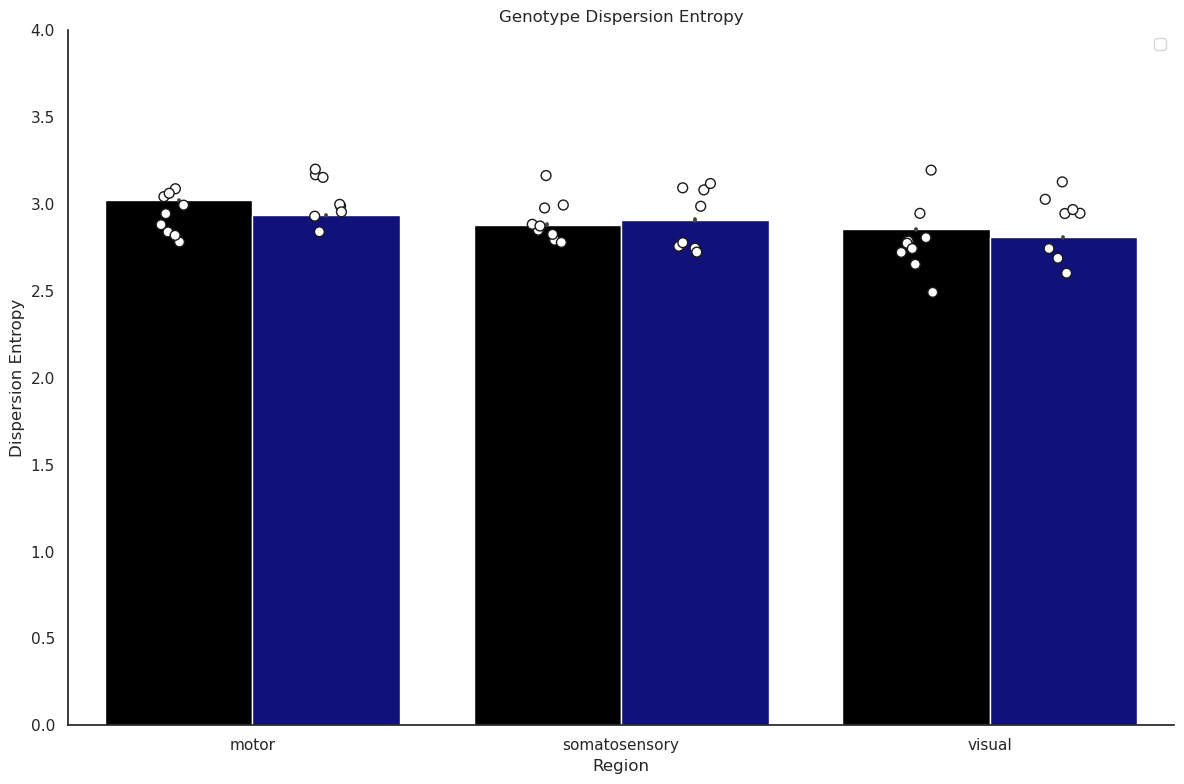

In [20]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Region", y="Entr", hue="Genotype", data=animals_concat, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Dispersion Entropy")
plt.title("Genotype Dispersion Entropy")
plt.ylim(0, 4.0)

stripplot = sns.stripplot(x="Region",y="Entr",hue="Genotype",data=mean_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

# Remove the legend
plt.legend(labels=[])

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/Plots/')
plt.savefig("genotype_entropy.png", dpi=300, bbox_inches="tight")
plt.savefig("genotype_entropy.svg", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
gap_hfd = animals_concat.loc[animals_concat['Genotype'] == 'GAP']
wt_hfd = animals_concat.loc[animals_concat['Genotype'] == 'WT']
mean_gap_df = gap_hfd.groupby(["Animal", "Genotype", "Region", "Brainstate"])["Entr"].mean().reset_index()
mean_wt_df = wt_hfd.groupby(["Animal", "Genotype", "Region", "Brainstate"])["Entr"].mean().reset_index()

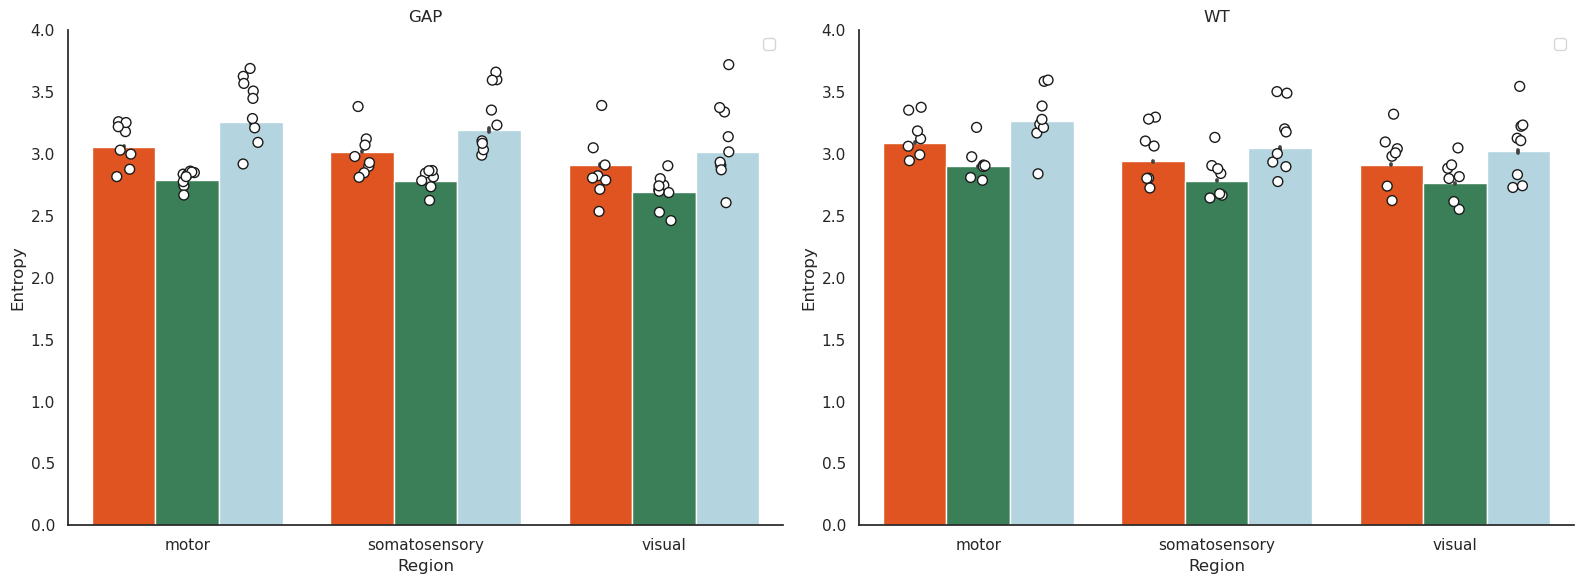

<Figure size 640x480 with 0 Axes>

In [24]:
# Set the style
sns.set(style="white")
br_palette = {0: "orangered", 1: "seagreen", 2: "lightblue"}
br_palette_strip = {0: "white", 1: "white", 2: "white"}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first subplot on axes[0]
sns.barplot(x="Region", y="Entr", hue="Brainstate", data=gap_hfd, palette=br_palette, ax=axes[0])
sns.stripplot(x="Region",y="Entr",hue="Brainstate",data=mean_gap_df,jitter=True,dodge=True,
                         size=5, palette = br_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1, ax = axes[0])
sns.despine()
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Entropy")
axes[0].set_title("GAP")
axes[0].set_ylim(0, 4.0)

# Plot the second subplot on axes[1]
sns.barplot(x="Region", y="Entr", hue="Brainstate", data=wt_hfd, palette=br_palette, ax=axes[1])
sns.stripplot(x="Region",y="Entr",hue="Brainstate",data=mean_wt_df,jitter=True,dodge=True,
                         size=5, palette = br_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1, ax = axes[1])
sns.despine()
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Entropy")
axes[1].set_title("WT")
axes[1].set_ylim(0, 4.0)


# Adjust spacing between subplots
plt.tight_layout()

# Remove the legend
axes[0].legend(labels=[])
axes[1].legend(labels=[])

# Show the figure
plt.show()

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/Plots/')
plt.savefig("region_br_entr.png", dpi=300, bbox_inches="tight")
plt.savefig("region_br_entr.svg", dpi=300, bbox_inches="tight")
plt.show()

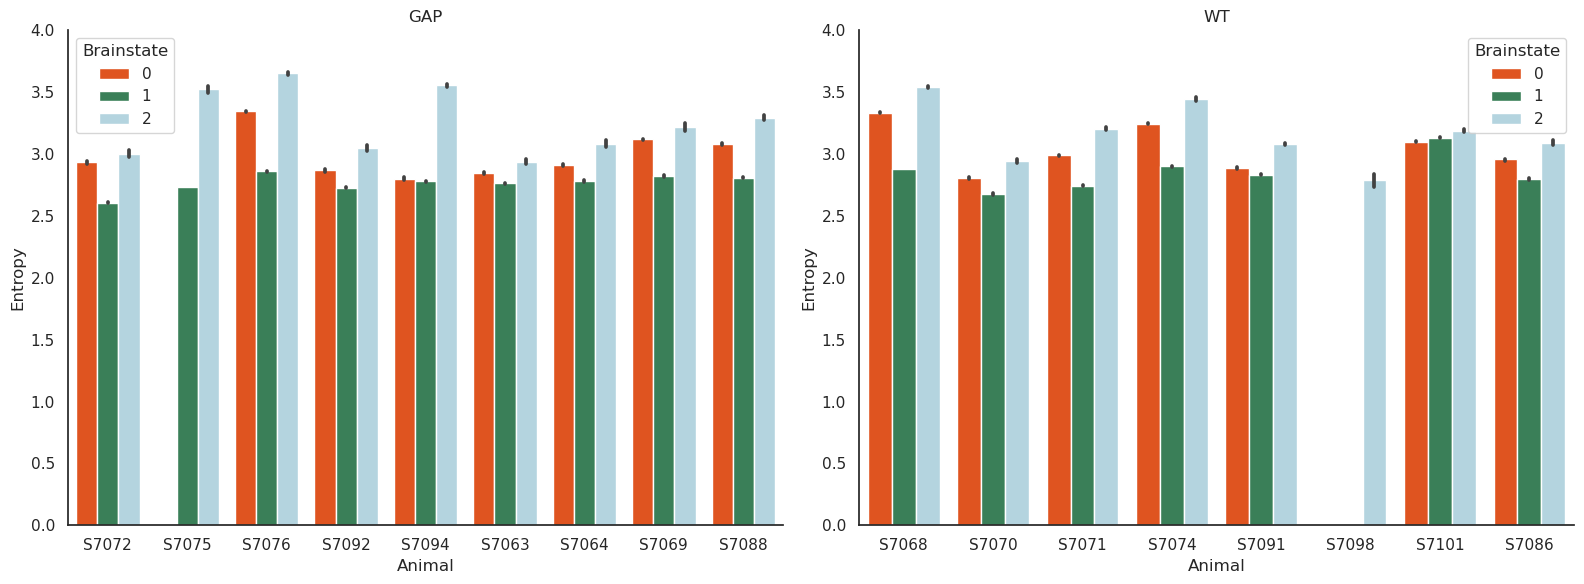

<Figure size 640x480 with 0 Axes>

In [27]:
# Set the style
sns.set(style="white")
br_palette = {0: "orangered", 1: "seagreen", 2: "lightblue"}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first subplot on axes[0]
sns.barplot(x="Animal", y="Entr", hue="Brainstate", data=gap_hfd, palette=br_palette, ax=axes[0])
sns.despine()
axes[0].set_xlabel("Animal")
axes[0].set_ylabel("Entropy")
axes[0].set_title("GAP")
axes[0].set_ylim(0, 4.0)

# Plot the second subplot on axes[1]
sns.barplot(x="Animal", y="Entr", hue="Brainstate", data=wt_hfd, palette=br_palette, ax=axes[1])
sns.despine()
axes[1].set_xlabel("Animal")
axes[1].set_ylabel("Entropy")
axes[1].set_title("WT")
axes[1].set_ylim(0, 4.0)


# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Complexity/Plots/')
plt.savefig("animal_br_entr.png", dpi=300, bbox_inches="tight")
plt.savefig("animal_br_entr.svg", dpi=300, bbox_inches="tight")
plt.show()